**Objective**: Implement the MLP(MultiLayer Perceptron) for the MNIST Handwritten digit Dataset by using tensorflow and Keras. Plot the Loss and accuracy curve for the dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [3]:
#Perform scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [6]:
#Flattening of Images
x_train_flat = x_train.reshape(x_train.shape[0],-1)
x_test_flat = x_test.reshape(x_test.shape[0],-1)

In [7]:
x_train_flat.shape

(60000, 784)

In [8]:
#convert the labels in to one hot encoder
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test,num_classes=10)

In [9]:
#Construct your model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
epoch_hist = model.fit(x_train,y_train_cat,epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2414 - accuracy: 0.9294
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0995 - accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0425 - accuracy: 0.9868


In [13]:
epoch_hist.history['loss']

[0.24143898487091064,
 0.09951769560575485,
 0.06936611980199814,
 0.052394986152648926,
 0.04247076436877251]

In [14]:
epoch_hist.history['accuracy']

[0.9293833374977112,
 0.9700499773025513,
 0.9791666865348816,
 0.9836333394050598,
 0.9868166446685791]

Text(0.5, 1.0, 'Loss Progression during training')

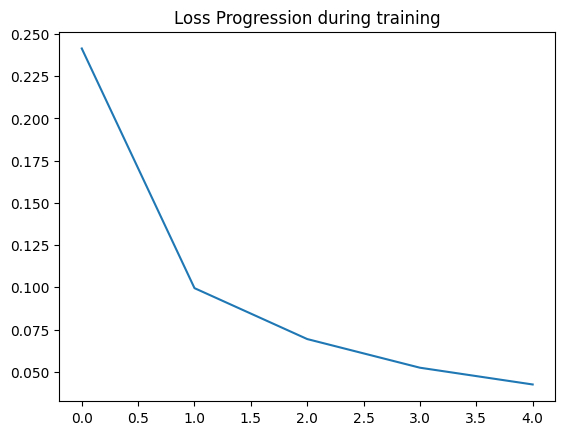

In [15]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.title('Loss Progression during training')

Text(0.5, 1.0, 'Accuracy Progression during training')

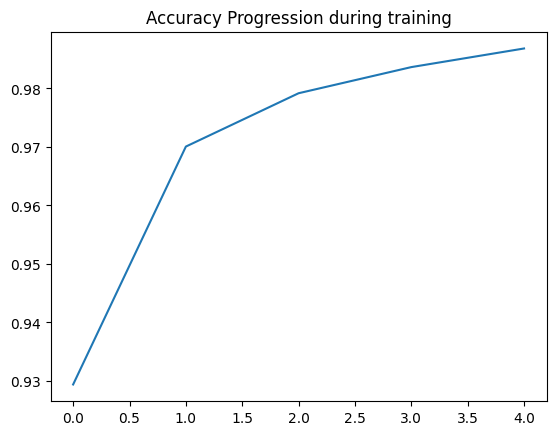

In [16]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['accuracy'])
plt.title('Accuracy Progression during training')

In [17]:
test_loss,test_acc = model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0798 - accuracy: 0.9756


In [18]:
print(f'Test loss is:{test_loss}')
print(f'Test accuracy is:{test_acc}')

Test loss is:0.07981003820896149
Test accuracy is:0.975600004196167
